In [1]:
%matplotlib inline

In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open('../WLASL/start_kit/WLASL_v0.3.json', 'r') as file:
    dataset = json.load(file)

In [4]:
total_glosses = []
total_glosses_count = {}

for entry in dataset:
    instances = entry['instances']
    glosses = entry['gloss']
    
    instances_per_gloss = len(instances)
    total_glosses_count[f'{glosses}'] = instances_per_gloss

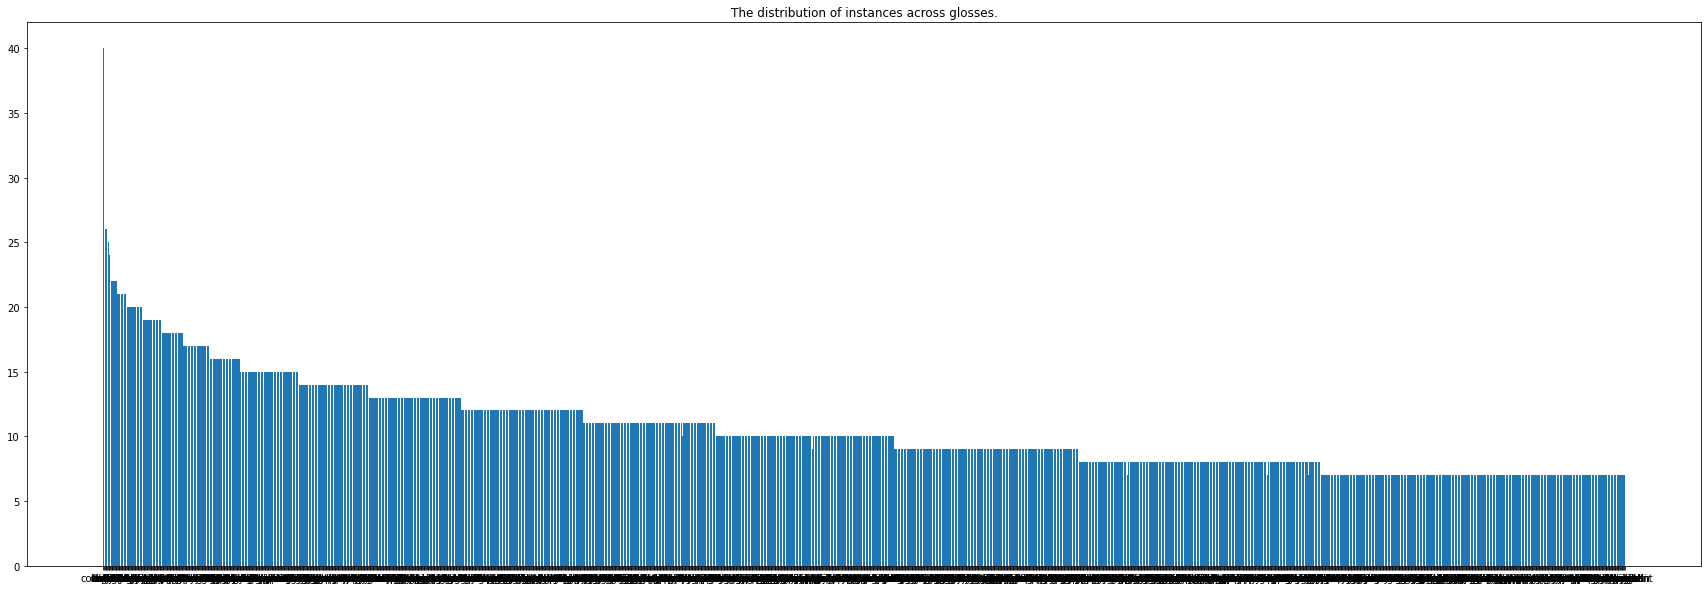

In [5]:
plt.figure(figsize = (30, 10))
plt.title('The distribution of instances across glosses.')
plt.bar(total_glosses_count.keys(), total_glosses_count.values())
plt.show()

In [6]:
df = pd.DataFrame.from_dict(total_glosses_count, orient = 'index')
df.columns = ['gloss_count']
df = df.sort_values(by = ['gloss_count'], ascending = False)

df.head()

,gloss_count
book,40
drink,35
computer,30
before,26
chair,26


In [7]:
df['Label'] = pd.cut(x = df['gloss_count'], bins = list(range(0, 50, 10)),
                    labels = [10, 20, 30, 40])
df.head()

,gloss_count,Label
book,40,40
drink,35,40
computer,30,30
before,26,30
chair,26,30


In [8]:
df['Label'].value_counts()

10    1197
20     771
30      30
40       2
Name: Label, dtype: int64

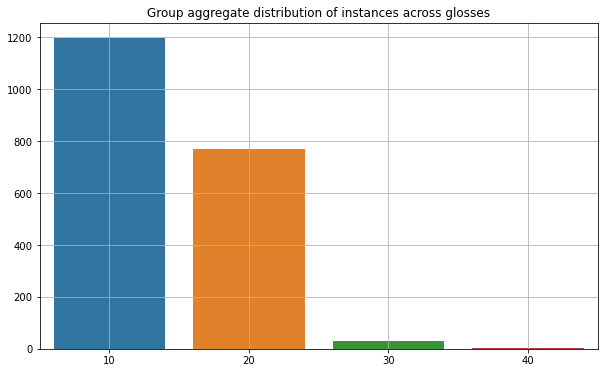

In [9]:
#Create a bar chart.
plt.figure(figsize = (10, 6))

plt.title('Group aggregate distribution of instances across glosses')

#Bar chart.
sns.barplot(y = df['Label'].value_counts().tolist(), x = df['Label'].value_counts().index.tolist())
plt.grid()
plt.show()

In [10]:
data = np.log(df['Label'].value_counts().tolist())

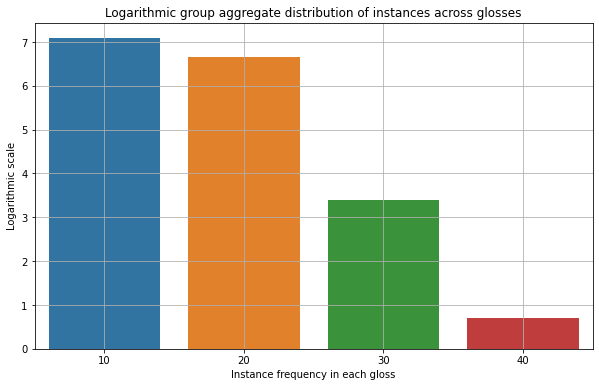

In [11]:
#Create a logarithmic bar chart.
plt.figure(figsize = (10, 6))

plt.title('Logarithmic group aggregate distribution of instances across glosses')

#Bar chart.
sns.barplot(y = data, x = df['Label'].value_counts().index.tolist())
plt.ylabel('Logarithmic scale')
plt.xlabel('Instance frequency in each gloss')
plt.grid()
plt.show()

***
## From the above bar charts, we derive the following conclusions:
### 1. The distribution of instances per gloss is not evenly distributed, hence the dataset is `imbalanced.`
### 2. Majority of the gloss classes have less instances.